In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
Influenza = 'Influenza N1H1 2008_2010 America.csv'


# Read the mouse data and the study results
influenza_data= pd.read_csv(Influenza)
influenza_data.head()


,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
0,Argentina,Region of the Americas of WHO,Temperate South America,2008,1,12/31/2007,1/6/2008,NaN,19.0,0.0,NaN,0.0,19.0,No Activity
1,Argentina,Region of the Americas of WHO,Temperate South America,2008,2,1/7/2008,1/13/2008,NaN,21.0,0.0,NaN,0.0,21.0,No Activity
2,Argentina,Region of the Americas of WHO,Temperate South America,2008,3,1/14/2008,1/20/2008,NaN,27.0,0.0,NaN,0.0,27.0,No Activity
3,Argentina,Region of the Americas of WHO,Temperate South America,2008,4,1/21/2008,1/27/2008,NaN,25.0,0.0,NaN,0.0,25.0,No Activity
4,Argentina,Region of the Americas of WHO,Temperate South America,2008,5,1/28/2008,2/3/2008,NaN,26.0,0.0,NaN,0.0,26.0,No Activity


### South America
#### 2008

In [2]:
# filt= (influenza_data["FLUREGION"]== "Temperate South America")&(influenza_data["Year"]== 2010) 
filt_08= ((influenza_data["FLUREGION"]== "Temperate South America")|(influenza_data["FLUREGION"]== "Tropical South America"))& (influenza_data["Year"]== 2008)
south_amer_08= influenza_data.loc[filt_08, :]
#Replace Nan values with 0 to make a better plot
south_amer_08= south_amer_08.fillna(0)
south_amer_08

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
0,Argentina,Region of the Americas of WHO,Temperate South America,2008,1,12/31/2007,1/6/2008,0.0,19.0,0.0,0.0,0.0,19.0,No Activity
1,Argentina,Region of the Americas of WHO,Temperate South America,2008,2,1/7/2008,1/13/2008,0.0,21.0,0.0,0.0,0.0,21.0,No Activity
2,Argentina,Region of the Americas of WHO,Temperate South America,2008,3,1/14/2008,1/20/2008,0.0,27.0,0.0,0.0,0.0,27.0,No Activity
3,Argentina,Region of the Americas of WHO,Temperate South America,2008,4,1/21/2008,1/27/2008,0.0,25.0,0.0,0.0,0.0,25.0,No Activity
4,Argentina,Region of the Americas of WHO,Temperate South America,2008,5,1/28/2008,2/3/2008,0.0,26.0,0.0,0.0,0.0,26.0,No Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,Uruguay,Region of the Americas of WHO,Temperate South America,2008,48,11/24/2008,11/30/2008,0.0,0.0,0.0,0.0,0.0,0.0,No Report
2246,Uruguay,Region of the Americas of WHO,Temperate South America,2008,49,12/1/2008,12/7/2008,0.0,0.0,0.0,0.0,0.0,0.0,No Report
2247,Uruguay,Region of the Americas of WHO,Temperate South America,2008,50,12/8/2008,12/14/2008,0.0,0.0,0.0,0.0,0.0,0.0,No Report
2248,Uruguay,Region of the Americas of WHO,Temperate South America,2008,51,12/15/2008,12/21/2008,0.0,0.0,0.0,0.0,0.0,0.0,No Report


In [3]:
# Get the number of countries in this region
south_amer_08["Country"].value_counts()

Colombia     52
Chile        52
Brazil       52
Paraguay     52
Argentina    52
Uruguay      52
Ecuador      52
Peru         52
Name: Country, dtype: int64

In [4]:
print(south_amer_08.count())

Country              416
WHOREGION            416
FLUREGION            416
Year                 416
Week                 416
SDATE                416
EDATE                416
SPEC_RECEIVED_NB     416
SPEC_PROCESSED_NB    416
AH1                  416
AH1N12009            416
ALL_INF              416
ALL_INF2             416
TITLE                416
dtype: int64


In [5]:
south_title_08= pd.DataFrame(south_amer_08["TITLE"].value_counts())
south_title_08

,TITLE
No Report,143
Sporadic,134
No Activity,109
Local Outbreak,20
Widespread Outbreak,5
Regional Outbreak,5


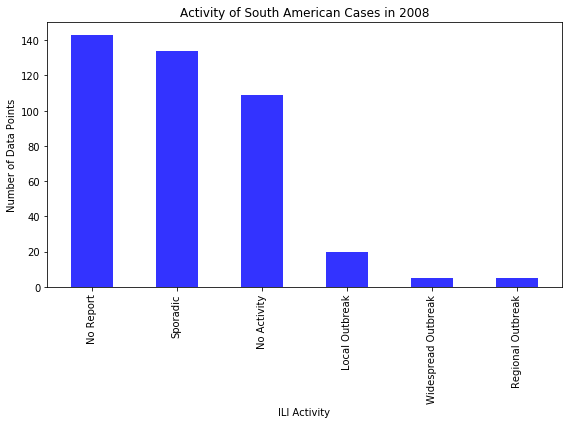

In [23]:
#Graphing with plt
x_axis = np.arange(len(south_title_08))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))
plt.xticks(tick_locations, south_title_08.index.values, rotation="vertical")
plt.bar(x_axis, south_title_08["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.title("Activity of South American Cases in 2008")
plt.tight_layout()

#Save Graph
plt.savefig('Output/Activity of South American Cases in 2008.png')

### South America
#### 2009

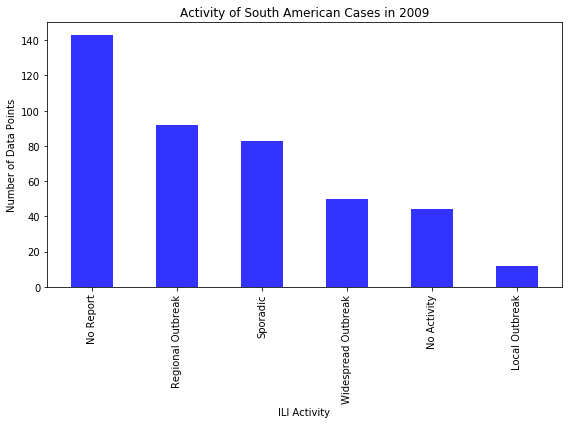

In [24]:
filt_09= ((influenza_data["FLUREGION"]== "Temperate South America")|(influenza_data["FLUREGION"]== "Tropical South America"))& (influenza_data["Year"]== 2009)
south_amer_09= influenza_data.loc[filt_09, :]
#Replace Nan values with 0 to make a better plot
south_amer_09= south_amer_09.fillna(0)
south_title_09= pd.DataFrame(south_amer_09["TITLE"].value_counts())
#Graphing with plt
x_axis = np.arange(len(south_title_09))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))
plt.xticks(tick_locations, south_title_09.index.values, rotation="vertical")
plt.bar(x_axis, south_title_09["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.title("Activity of South American Cases in 2009")
plt.tight_layout()

#Save Graph
plt.savefig('Output/Activity of South American Cases in 2009.png')

### South America
#### 2010

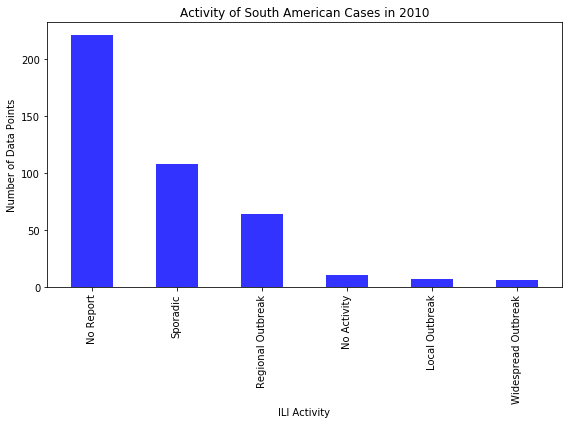

In [25]:
filt_10= ((influenza_data["FLUREGION"]== "Temperate South America")|(influenza_data["FLUREGION"]== "Tropical South America"))&(influenza_data["Year"]== 2010)
south_amer_10= influenza_data.loc[filt_10, :]
#Replace Nan values with 0 to make a better plot
south_amer_10= south_amer_10.fillna(0)
south_title_10= pd.DataFrame(south_amer_10["TITLE"].value_counts())
#Graphing with plt
x_axis = np.arange(len(south_title_10))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))
plt.xticks(tick_locations, south_title_10.index.values, rotation="vertical")
plt.bar(x_axis, south_title_10["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.title("Activity of South American Cases in 2010")
plt.tight_layout()

#Save Graph
plt.savefig('Output/Activity of South American Cases in 2010.png')

### Central America
#### 2008

In [9]:
central_amer_08= influenza_data.loc[((influenza_data["FLUREGION"]== "Central America and Caribbean")&(influenza_data["Year"]== 2008)), :]
central_amer_08

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
785,Costa Rica,Region of the Americas of WHO,Central America and Caribbean,2008,1,12/31/2007,1/6/2008,NaN,1.0,0.0,NaN,1.0,NaN,No Report
786,Costa Rica,Region of the Americas of WHO,Central America and Caribbean,2008,2,1/7/2008,1/13/2008,NaN,1.0,0.0,NaN,1.0,NaN,No Report
787,Costa Rica,Region of the Americas of WHO,Central America and Caribbean,2008,3,1/14/2008,1/20/2008,NaN,NaN,0.0,NaN,0.0,NaN,No Report
788,Costa Rica,Region of the Americas of WHO,Central America and Caribbean,2008,4,1/21/2008,1/27/2008,NaN,NaN,0.0,NaN,0.0,NaN,No Report
789,Costa Rica,Region of the Americas of WHO,Central America and Caribbean,2008,5,1/28/2008,2/3/2008,NaN,NaN,0.0,NaN,0.0,NaN,No Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mexico,Region of the Americas of WHO,Central America and Caribbean,2008,48,11/24/2008,11/30/2008,NaN,376.0,0.0,NaN,3.0,373.0,Sporadic
1618,Mexico,Region of the Americas of WHO,Central America and Caribbean,2008,49,12/1/2008,12/7/2008,NaN,421.0,0.0,NaN,6.0,415.0,Sporadic
1619,Mexico,Region of the Americas of WHO,Central America and Caribbean,2008,50,12/8/2008,12/14/2008,NaN,351.0,0.0,NaN,5.0,346.0,Sporadic
1620,Mexico,Region of the Americas of WHO,Central America and Caribbean,2008,51,12/15/2008,12/21/2008,NaN,335.0,0.0,NaN,0.0,335.0,No Activity


In [10]:
central_amer_08["Country"].value_counts()

Mexico         52
Cuba           52
El Salvador    52
Costa Rica     52
Honduras       52
Name: Country, dtype: int64

In [11]:
print(central_amer_08.count())

Country              260
WHOREGION            260
FLUREGION            260
Year                 260
Week                 260
SDATE                260
EDATE                260
SPEC_RECEIVED_NB       0
SPEC_PROCESSED_NB    172
AH1                  175
AH1N12009              1
ALL_INF              183
ALL_INF2             161
TITLE                260
dtype: int64


In [12]:
central_title_08= pd.DataFrame(central_amer_08["TITLE"].value_counts())
central_title_08

,TITLE
No Report,155
No Activity,56
Sporadic,47
Local Outbreak,2


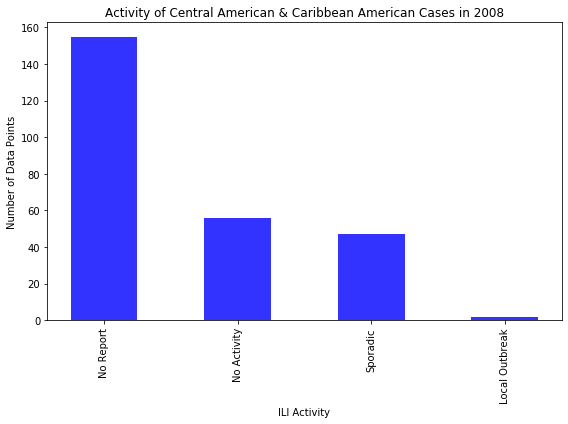

In [26]:
#Graphing with plt
x_axis = np.arange(len(central_title_08))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))
plt.xticks(tick_locations, central_title_08.index.values, rotation="vertical")
plt.bar(x_axis, central_title_08["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.title("Activity of Central American & Caribbean American Cases in 2008")
plt.tight_layout()

#Save Graph
plt.savefig('Output/Activity of Central American & Caribbean American Cases in 2008.png')

### Central America
#### 2009

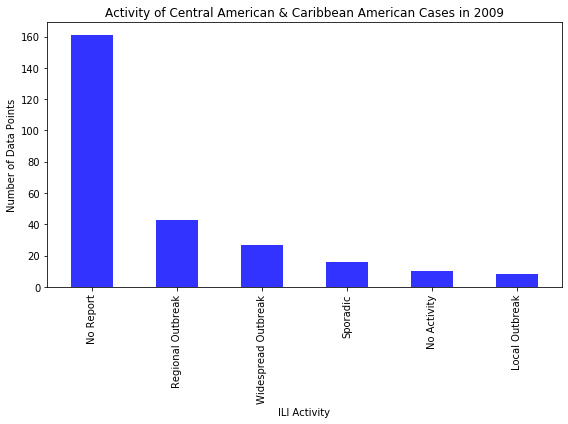

In [27]:
central_amer_09= influenza_data.loc[((influenza_data["FLUREGION"]== "Central America and Caribbean")&(influenza_data["Year"]== 2009)), :]

central_title_09= pd.DataFrame(central_amer_09["TITLE"].value_counts())

#Graphing with plt
x_axis = np.arange(len(central_title_09))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))
plt.xticks(tick_locations, central_title_09.index.values, rotation="vertical")
plt.bar(x_axis, central_title_09["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.title("Activity of Central American & Caribbean American Cases in 2009")
plt.tight_layout()

#Save Graph
plt.savefig('Output/Activity of Central American & Caribbean American Cases in 2009.png')

### Central America
#### 2010

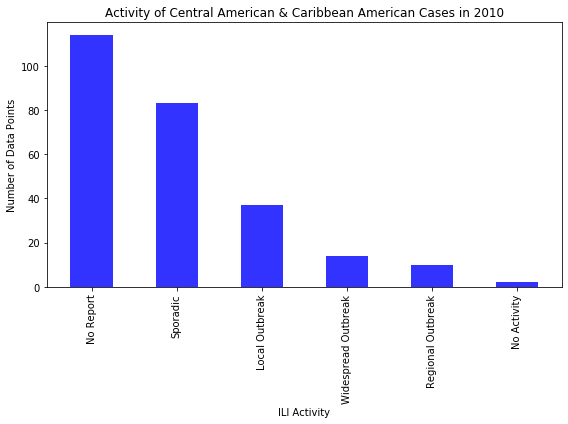

In [28]:
central_amer_10= influenza_data.loc[((influenza_data["FLUREGION"]== "Central America and Caribbean")&(influenza_data["Year"]== 2010)), :]

central_title_10= pd.DataFrame(central_amer_10["TITLE"].value_counts())

#Graphing with plt
x_axis = np.arange(len(central_title_10))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))
plt.xticks(tick_locations, central_title_10.index.values, rotation="vertical")
plt.bar(x_axis, central_title_10["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.title("Activity of Central American & Caribbean American Cases in 2010")
plt.tight_layout()

#Save Graph
plt.savefig('Output/Activity of Central American & Caribbean American Cases in 2010.png')

### North America
#### 2008

In [16]:
north_amer_08= influenza_data.loc[((influenza_data["FLUREGION"]== "North America") &(influenza_data["Year"]== 2008)), :]
north_amer_08

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
314,Canada,Region of the Americas of WHO,North America,2008,1,12/31/2007,1/6/2008,NaN,2770.0,NaN,NaN,292.0,NaN,No Report
315,Canada,Region of the Americas of WHO,North America,2008,2,1/7/2008,1/13/2008,NaN,4418.0,2.0,NaN,267.0,NaN,No Report
316,Canada,Region of the Americas of WHO,North America,2008,3,1/14/2008,1/20/2008,NaN,3801.0,1.0,NaN,300.0,NaN,No Report
317,Canada,Region of the Americas of WHO,North America,2008,4,1/21/2008,1/27/2008,NaN,3904.0,2.0,NaN,351.0,NaN,No Report
318,Canada,Region of the Americas of WHO,North America,2008,5,1/28/2008,2/3/2008,NaN,4135.0,NaN,NaN,508.0,NaN,No Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,United States of America,Region of the Americas of WHO,North America,2008,48,11/24/2008,11/30/2008,NaN,4636.0,40.0,NaN,112.0,NaN,Sporadic
2089,United States of America,Region of the Americas of WHO,North America,2008,49,12/1/2008,12/7/2008,NaN,5356.0,43.0,NaN,120.0,NaN,Sporadic
2090,United States of America,Region of the Americas of WHO,North America,2008,50,12/8/2008,12/14/2008,NaN,5788.0,71.0,NaN,183.0,NaN,Local Outbreak
2091,United States of America,Region of the Americas of WHO,North America,2008,51,12/15/2008,12/21/2008,NaN,6057.0,73.0,NaN,256.0,NaN,Sporadic


In [17]:
north_amer_08["Country"].value_counts()

Canada                      52
United States of America    52
Name: Country, dtype: int64

In [18]:
print(north_amer_08.count())

Country              104
WHOREGION            104
FLUREGION            104
Year                 104
Week                 104
SDATE                104
EDATE                104
SPEC_RECEIVED_NB       0
SPEC_PROCESSED_NB    104
AH1                   69
AH1N12009              0
ALL_INF              104
ALL_INF2               0
TITLE                104
dtype: int64


In [19]:
north_title_08= pd.DataFrame(north_amer_08["TITLE"].value_counts())
north_title_08

,TITLE
No Report,52
Sporadic,31
Widespread Outbreak,10
Local Outbreak,6
Regional Outbreak,3
No Activity,2


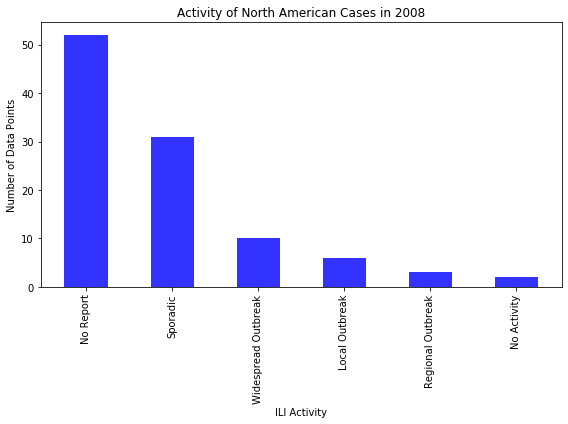

In [29]:
#Graphing with plt
x_axis = np.arange(len(north_title_08))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))
plt.xticks(tick_locations, north_title_08.index.values, rotation="vertical")
plt.bar(x_axis, north_title_08["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.title("Activity of North American Cases in 2008")
plt.tight_layout()

#Save Graph
plt.savefig('Output/Activity of North American Cases in 2008.png')

### North America
#### 2009

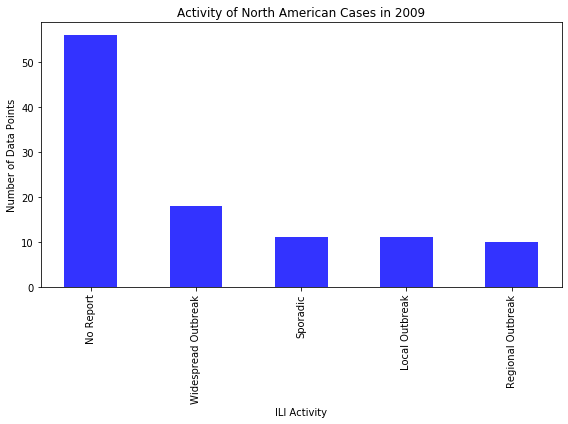

In [30]:
north_amer_09= influenza_data.loc[((influenza_data["FLUREGION"]== "North America") &(influenza_data["Year"]== 2009)), :]

north_title_09= pd.DataFrame(north_amer_09["TITLE"].value_counts())

#Graphing with plt
x_axis = np.arange(len(north_title_09))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))
plt.xticks(tick_locations, north_title_09.index.values, rotation="vertical")
plt.bar(x_axis, north_title_09["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.title("Activity of North American Cases in 2009")
plt.tight_layout()

#Save Graph
plt.savefig('Output/Activity of North American Cases in 2009.png')

### North America
#### 2010

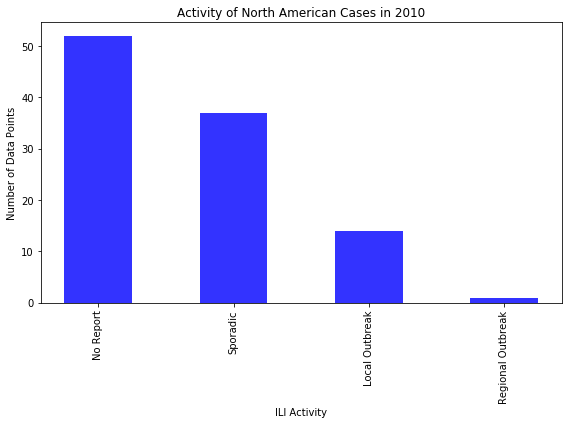

In [31]:
north_amer_10= influenza_data.loc[((influenza_data["FLUREGION"]== "North America") &(influenza_data["Year"]== 2010)), :]

north_title_10= pd.DataFrame(north_amer_10["TITLE"].value_counts())

#Graphing with plt
x_axis = np.arange(len(north_title_10))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))
plt.xticks(tick_locations, north_title_10.index.values, rotation="vertical")
plt.bar(x_axis, north_title_10["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.title("Activity of North American Cases in 2010")
plt.tight_layout()

#Save Graph
plt.savefig('Output/Activity of North American Cases in 2010.png')